#### May 13, 2020

### To understand Statistics or math learn chapter 4 Introduction to Statistical learning by GarethJames , et al.

### This chapter starts with a linear Regression  and will cover the following topics

## 1. Machine Learning Beginning

## 2. Logistic Regression with Python

## 3. Introduction to K Nearest Neighbors

## 4.  Decision Trees and Random Forests in Python
to understand mathematics read the following 
Introduction to statistical learning
By Gareh James, etal

___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Linear Regression with Python

** This is mostly just code for reference. Please watch the video lecture for more info behind all of this code.**

Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

# Supervised Learning:

###### Spervised learning algoriethms are trained using labled examples such as an input where the output is known

###### For example: a segment of text could have a category label such as

###### *Spam vs Legitimate Email


##### *Positive vs Negative Movie Review

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
USA_Housing = pd.read_csv('USA_Housing.csv')

In [6]:
USA_Housing.head(1)

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...

In [11]:
USA_Housing.info() #  will inform you the total no of columns
#Total no of entries
# Also will give you the waht type of the obj is. for eg here float 64 means the the 
#dat is the flost type of the object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [12]:
USA_Housing.describe()
# tO DISPLAY THE quick account of the statistical information
# For example the mean, min max standard deviation(std) etc
#In this data set the address colum is not available because it is the string value

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [14]:
USA_Housing.columns 
# just incase if you like to reference the name of the folumns
# It will return back the list of the columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

## EDA
Let's create some simple plots to check out the data!

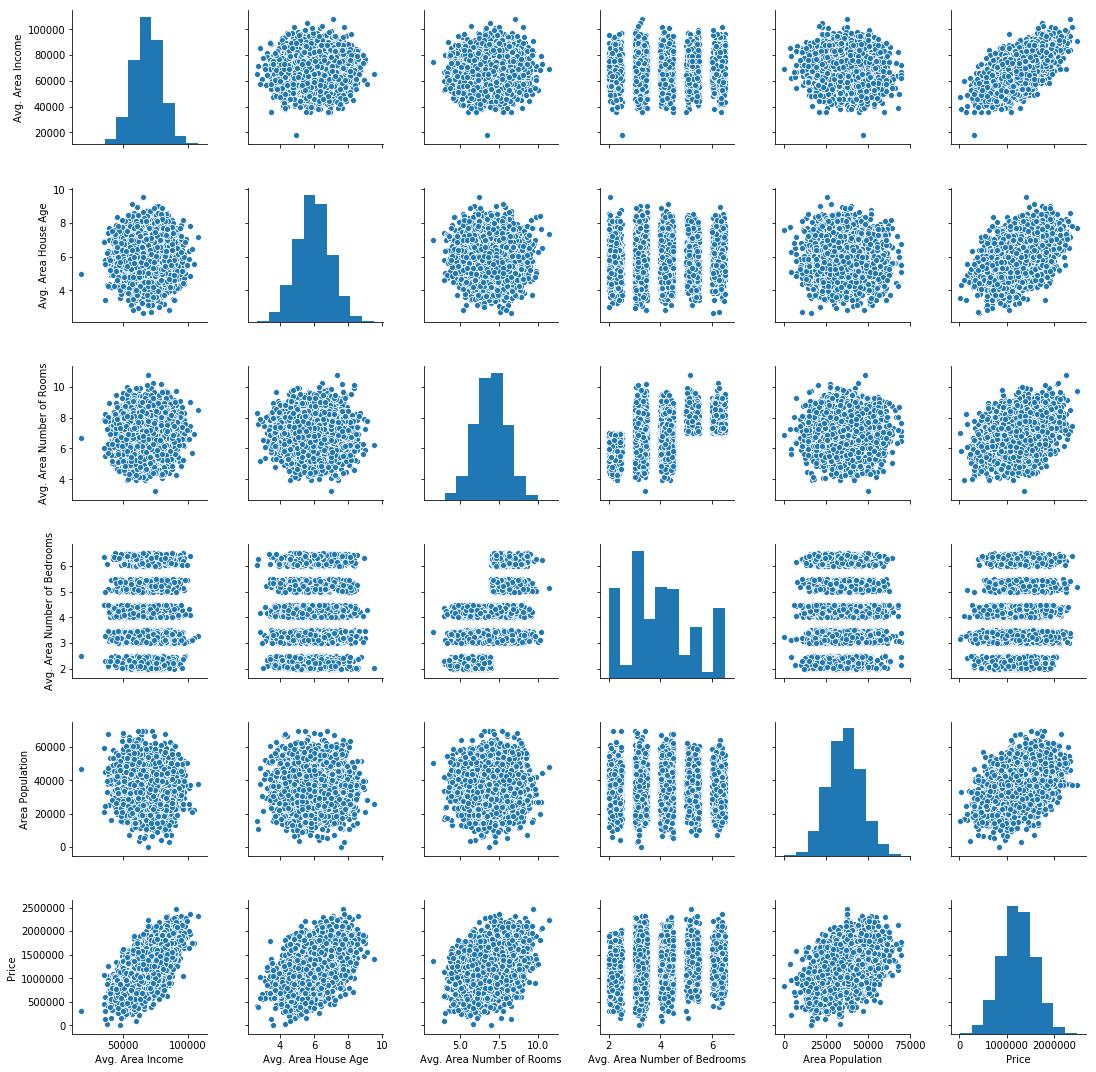

In [17]:
sns.pairplot(USA_Housing)

/home/bishnu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


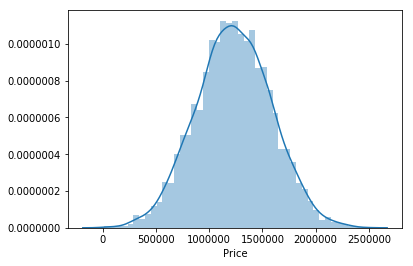

In [19]:
sns.distplot(USA_Housing['Price'])

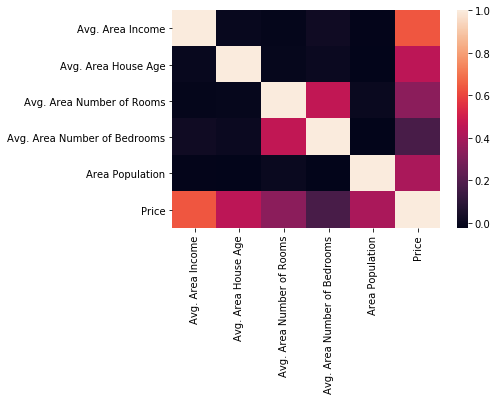

In [21]:
sns.heatmap(USA_Housing.corr())

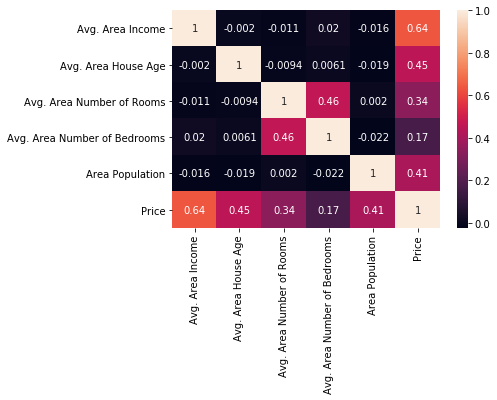

In [23]:
sns.heatmap(USA_Housing.corr(),annot=True)
# The annot will pass the actual numbers i the correlation

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [40]:
X = USA_Housing[['Avg. Area Income','Avg. Area House Age',
                 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]
y=USA_Housing['Price']
# Here Y is the target variable that what we are going to predict the price  of the house

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=101)
# test size in the daa allocated for the test
# In  this case we allocated 40 % of the dta

## Creating and Training the Model

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lm=LinearRegression()

In [48]:
lm.fit(X_train,y_train) 
# in order to fit the model or train the data
# we would like to fit the model to train the data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [49]:
# Print the intercept
print(lm.intercept_)

-2640159.796851911


In [50]:
coeff_USA=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_USA

Coefficient
Avg. Area Income                  21.528276
Avg. Area House Age           164883.282027
Avg. Area Number of Rooms     122368.678027
Avg. Area Number of Bedrooms    2233.801864
Area Population                   15.150420

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

Does this make sense? Probably not because I made up this data. If you want real data to repeat this sort of analysis, check out the [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):



In [52]:
from sklearn.datasets import load_boston


In [53]:
boston = load_boston()

In [54]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [56]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

##### If you like to grab the data itself

In [57]:
print(boston['data'])

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


#### Can also grab the feature names

In [72]:
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


#### Can also grab the taeget

In [60]:
print(boston['target']) #the numbers are in the thousands

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

### Linear REgression with Python Part 2

###### In this part we are going to focus on getting predictions from our model

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [63]:
predictions = lm.predict(X_test)

In [64]:
predictions # these are the predicted prices of the  house

array([1260960.70567626,  827588.75560352, 1742421.24254328, ...,
        372191.40626952, 1365217.15140895, 1914519.54178824])

In [66]:
# Y-test contains the correct pricce of the hosue
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
2866    7.300436e+05
2371    1.166925e+06
2952    7.054441e+05
45      1.499989e+06
4653    1.288199e+06
891     1.441737e+06
3011    1.279681e+06
335     1.754969e+06
3050    1.511653e+06
3850    1.441956e+06
834     1.119993e+06
3188    7.278665e+05
4675    1.138885e+06
2564    1.074263e+06
1866    1.386473e+06
1492    4.046436e+05
3720    1.449829e+06
618     1.775875e+06
3489    1.202051e+06
2145    1.105737e+06
3200    1.835565e+06
4752    1.795429e+06
602     1.424283e+06
4665    1.365945e+06
79      1.492011e+06
            ...     
4668    1.537865e+06
3762    4.269062e+05
236     8.090897e+05
4897    1.169265e+06
1283    9.809832e+05
2443    5.491679e+05
3600    8.238644e+05
2138    1.467960e+06
254     8.224317e+05
3987    1.550931e+06
527     1.293747e+06
1362    7.582626e+05
4577    1.479063e+06
2642    1.759180e+06
4297    1.864670e+06
1114    1.569122e+06
1041    1.610

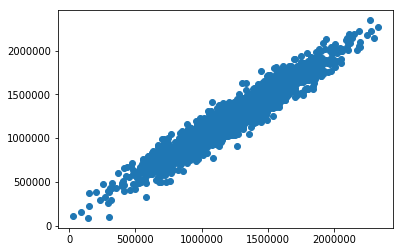

In [62]:
plt.scatter(y_test,predictions)

**Residual Histogram**

/home/bishnu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


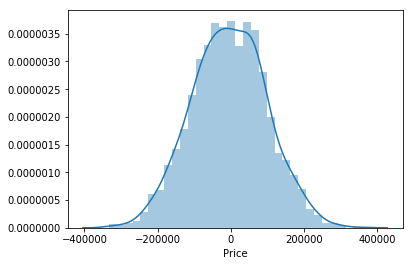

In [67]:
sns.distplot(y_test-predictions) #istograms of the residuals

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [70]:
from sklearn import metrics

In [71]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914957
MSE: 10460958907.209501
RMSE: 102278.82922291153


___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 
    
** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

##### **Check the head of customers, and check out its info() and describe() methods.**

In [76]:
customers=pd.read_csv('Ecommerce Customers')


In [77]:
customers.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [79]:
customers.describe()
# gives the statistical informations of the numerical columns

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

In [78]:
customers.info()
# to get some basic informations such as the types, how any entries, howmany columns
# It look slike we have 500 rows and 8 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [80]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [119]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

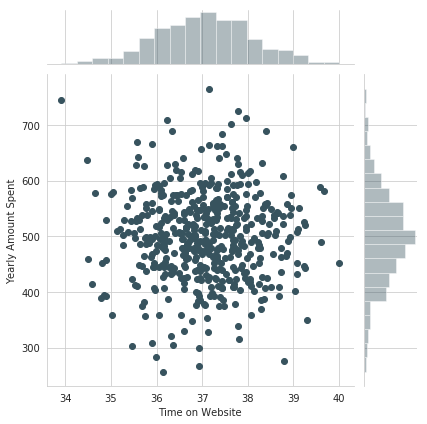

In [120]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

##### ** Do the same but with the Time on App column instead. **

/home/bishnu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


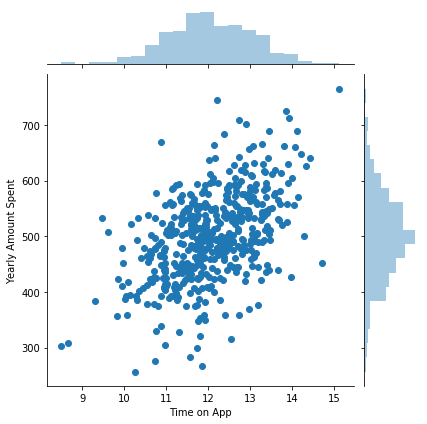

In [82]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

#### ** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

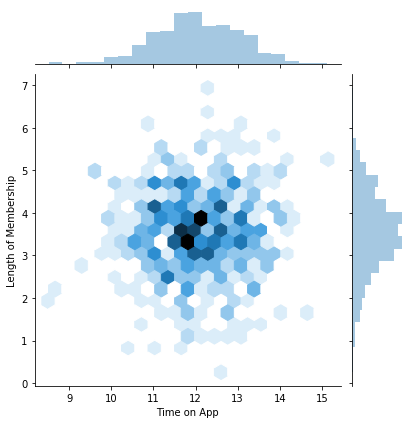

In [85]:
sns.jointplot(x='Time on App',y='Length of Membership',data=customers,kind='hex')

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

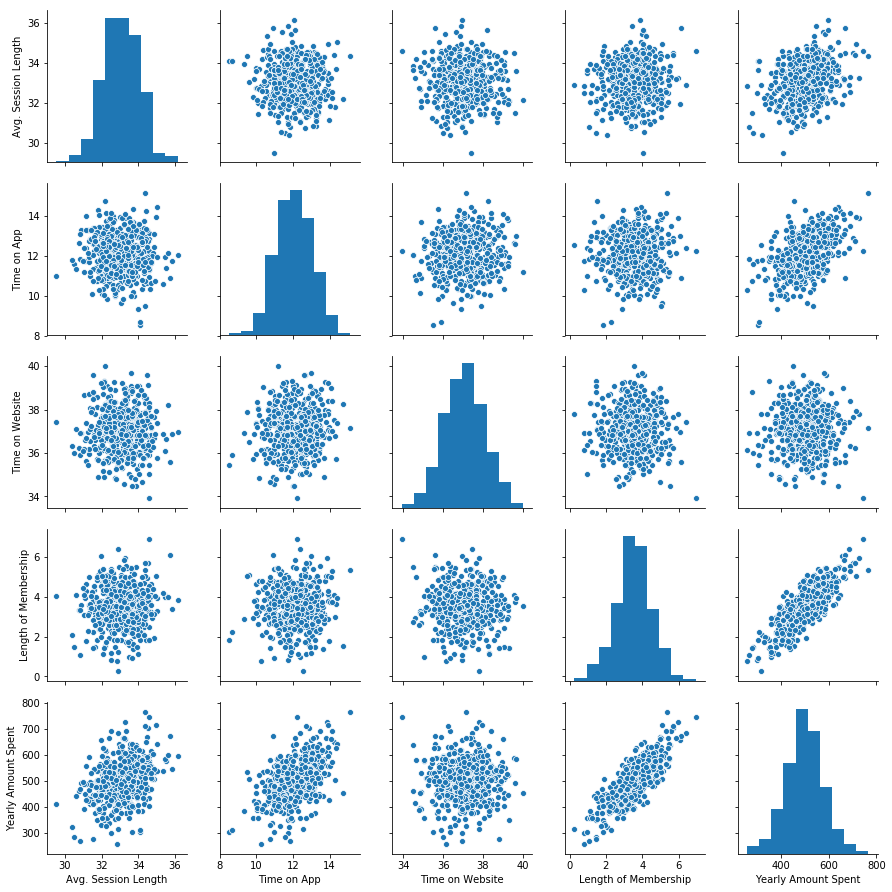

In [86]:
sns.pairplot(customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [ ]:
# The answer is the Length of Membership

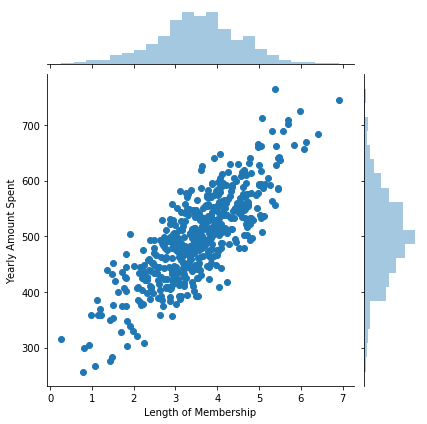

In [87]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

##### **Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

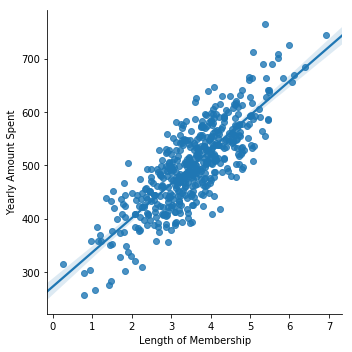

In [89]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [91]:
customers.head(1)

Email                                       Address  \
0  mstephenson@fernandez.com  835 Frank Tunnel\nWrightmouth, MI 82180-9605   

   Avatar  Avg. Session Length  Time on App  Time on Website  \
0  Violet            34.497268    12.655651        39.577668   

   Length of Membership  Yearly Amount Spent  
0              4.082621           587.951054

In [93]:
X = customers[['Avg. Session Length','Time on App',
                 'Time on Website','Length of Membership']]
y=customers['Yearly Amount Spent']
# Here Y is the target variable that what we are going to predict the price  of the house

##### ** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [121]:
from sklearn.model_selection import train_test_split

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
# test size in the daa allocated for the test
# In  this case we allocated 40 % of the dta

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [96]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm1.**

In [97]:
lm1=LinearRegression()

##### ** Train/fit lm on the training data.**

In [98]:
lm1.fit(X_train,y_train) 
# in order to fit the model or train the data
# we would like to fit the model to train the data
#Now we will have the fitted linear regression moodel

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

##### **Print out the coefficients of the model**

In [122]:
print('Coefficients: \n',lm1.coef_)

Coefficients: 
 [25.69154034 37.89259966  0.56058149 61.64859402]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [104]:
predictions1 = lm1.predict(X_test)
predictions1

array([454.37723888, 404.73920978, 410.6595358 , 591.19506767,
       590.48315271, 548.36329288, 576.56306627, 714.33230591,
       473.38888194, 546.20504453, 337.81423895, 498.63394109,
       552.79850714, 409.38698955, 763.56451897, 545.52471174,
       692.7459104 , 506.98519519, 571.624283  , 571.90629207,
       399.40384444, 554.4054445 , 457.04689994, 482.8550335 ,
       558.73802831, 414.15555804, 531.42618835, 376.62194862,
       533.90120117, 448.965154  , 594.41178964, 665.0233714 ,
       510.46683218, 572.98826802, 504.92594732, 566.11964751,
       460.38877433, 449.63854229, 421.25198379, 455.88005155,
       598.58823933, 451.01415921, 615.37728001, 511.63641531,
       503.39568893, 514.48995368, 568.69756516, 550.83947274,
       357.45919981, 464.41300621, 482.16508565, 534.17837065,
       256.09807621, 505.9056379 , 521.71659105, 314.22344754,
       502.95939205, 388.72205109, 473.26753359, 431.84002404,
       539.25280219, 589.21369338, 752.24896074, 558.19

##### ** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

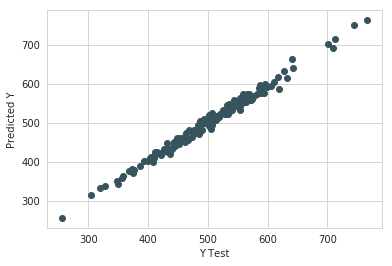

In [123]:
plt.scatter(y_test,predictions1)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
# The plot is very beautifl as it is perfect linear. That means our model is nice

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [108]:
from sklearn import metrics

In [109]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions1))
print('MSE:', metrics.mean_squared_error(y_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))

MAE: 7.220914752950594
MSE: 79.51027063771951
RMSE: 8.916853180226727


In [124]:
metrics.explained_variance_score(y_test,predictions1)# R^2 value for a regression fit
#This is the how much varience your model explains
# we explain about ninety nine % of the variance which is very good fitspeciall on the test data

0.9890813349739246

## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

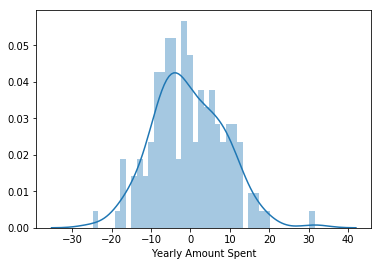

In [113]:
sns.distplot(y_test-predictions1,bins=40) #

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [99]:
coeff_customers=pd.DataFrame(lm1.coef_,X.columns,columns=['Coefficient'])
coeff_customers

Coefficient
Avg. Session Length     25.691540
Time on App             37.892600
Time on Website          0.560581
Length of Membership    61.648594

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [11]:
train =pd.read_csv('titanic_train.csv')

In [12]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [ ]:
# Lets  see whether the data is missing or not 
# in another word there is NaN 

In [13]:
train.isnull() # You will see a  false if it is not null
# or it is true if it  is null
# In the above table the Cabin Column has the Null values given by NaN

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
5          False     False   False  False  False   True  False  False   False   
6          False     False   False  False  False  False  False  False   False   
7          False     False   False  False  False  False  False  False   False   
8          False     False   False  False  False  False  False  False   False   
9          False     False   False  False  False  False  False  False   False   
10         False     False   False  False  False  False  False  False   False   
11         False     False   False  False  False  False  False  False   False   
12         False     False   False  False  False  False  False  False   False   
13         False     False   False  False  False  False  False  False   False   
14         False     False   False  False  False  False  False  False   False   
15         False     False   False  False  False  False  False  False   False   
16         False     False   False  False  False  False  False  False   False   
17         False     False   False  False  False   True  False  False   False   
18         False     False   False  False  False  False  False  False   False   
19         False     False   False  False  False   True  False  False   False   
20         False     False   False  False  False  False  False  False   False   
21         False     False   False  False  False  False  False  False   False   
22         False     False   False  False  False  False  False  False   False   
23         False     False   False  False  False  False  False  False   False   
24         False     False   False  False  False  False  False  False   False   
25         False     False   False  False  False  False  False  False   False   
26         False     False   False  False  False   True  False  False   False   
27         False     False   False  False  False  False  False  False   False   
28         False     False   False  False  False   True  False  False   False   
29         False     False   False  False  False   True  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
861        False     False   False  False  False  False  False  False   False   
862        False     False   False  False  False  False  False  False   False   
863        False     False   False  False  False   True  False  False   False   
864        False     False   False  False  False  False  False  False   False   
865        False     False   False  False  False  False  False  False   False   
866        False     False   False  False  False  False  False  False   False   
867        False     False   False  False  False  False  False  False   False   
868        False     False   False  False  False   True  False  False   False   
869        False     False   False  False  False  False  False  False   False   
870        False     False   False  False  False  False  False  False   False   
871        False     False   False  False  False  False  False  False   False   
872        False     False   False  False  False  False  False  False   False   
873        False     False   False  False  False  False  False  False   False   
874        False     False   False  False  False  False  False  False   False   
875        False     False   False  False  False  False  False  False   False   
876        False     False   False  False  False  False  False  False   False   
877        False     False   False  False  False  False  False  False   False   
878        False     False   False  

###### This sort of the data type we can make the heagt map

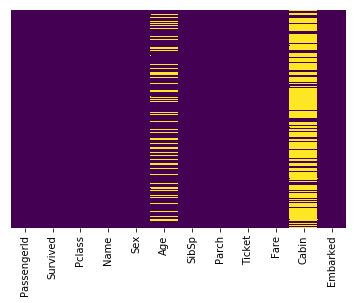

In [15]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#Due to the cmap every yellow dash here basically stand for a true point where true it was
# The yellow valuess are comes because of the missing age and the Cabin information
# Roughly about 20% of the age data is missing
# We can use the knowledge of the other columns to fill in reasinable values for that age column
# In the Cbin Column too much data is missing

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

In [16]:
sns.set_style('whitegrid')

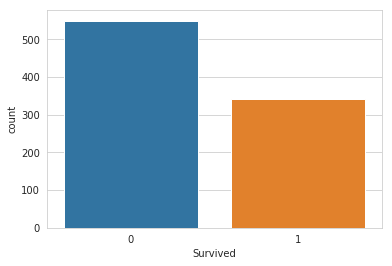

In [18]:
sns.countplot(x='Survived',data=train)
# In the following plot, o means not survived and 1 means survived

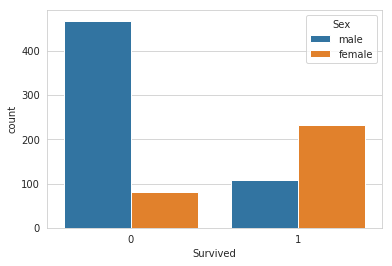

In [20]:
sns.countplot(x='Survived',data=train,hue='Sex')

##### Lets see the survived on the basis of the Pclass which is the Passanger class

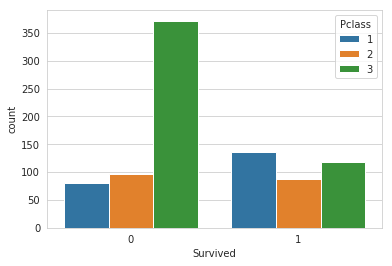

In [21]:
sns.countplot(x='Survived',data=train,hue='Pclass')

##### lets go aheda and get idea of the age of the people

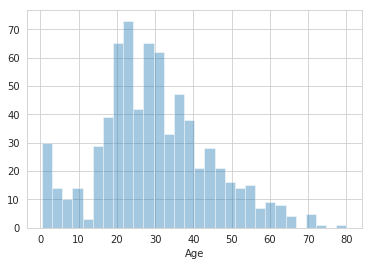

In [23]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)
#The dropna will skip the NaN value if present

##### Lets make the same plot in the another way

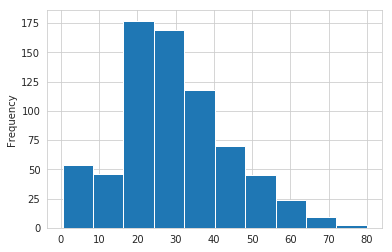

In [24]:
train['Age'].plot.hist()

##### In the above hhistogram can add some bins as well

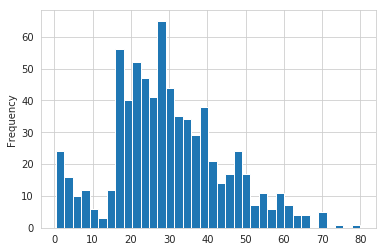

In [25]:
train['Age'].plot.hist(bins=36)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


###### Lets check the Sibsb column which is the sibling or the spouse

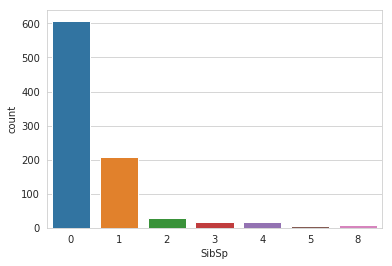

In [28]:
sns.countplot(x='SibSp',data=train)

That means  most of the people in the board has neither sibling nor the spouse. And if we look on the second most popular option its just  one which is actually most likely to be probably a spouse versus just having a single parent when children on board

###### Lets explore the fare column. Lets see how much people paid as a distribution

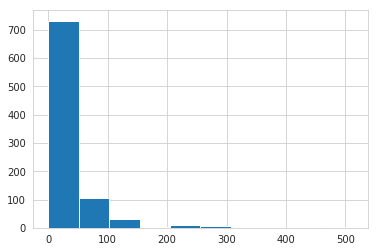

In [30]:
train['Fare'].hist()

###### In the above histogram most distributions looks between 0 and that of 100.

###### Now lets look the more details or in more depth

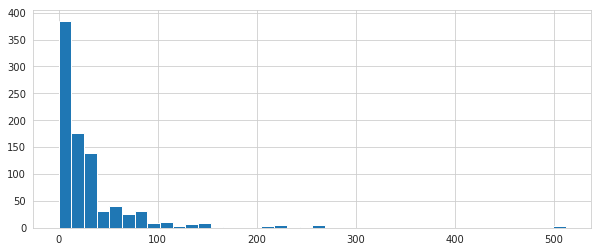

In [32]:
train['Fare'].hist(bins=40,figsize=(10,4))

##### Now it looks like the most of the distributions are in between 0 and 50. Previously we saw most of the passangers are on the 3rd class

### Lets how to do this sort of the plos with cufflinks just incase if you like to see the intersctive plots 

In [33]:
import cufflinks as cf

In [34]:
cf.go_offline()

In [35]:
train['Fare'].iplot(kind='hist',bins=40)
# with this plot we can zoom and can  use many propreties

### Logistic Regression with Python part 2

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


#### Cleaning our data will allow us into an acceptable form for our machine learning algorithms

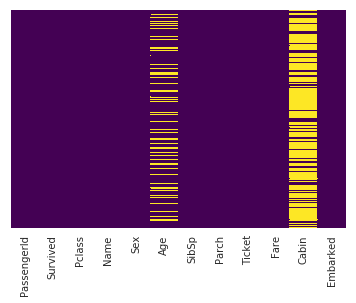

In [36]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


#### here we want to fill in the missing data for the Age column instead of just #
dropping all of the missing age data rows.
One way to do this is the filling the mean age of all the passangers
This is knoown as imputation. That means you could take the agerage age and fill in the missing
values with the average age

However we can even be a step smarter about this and check the aveage by passanger class

##### Going to create a box plot by  using the seaborn

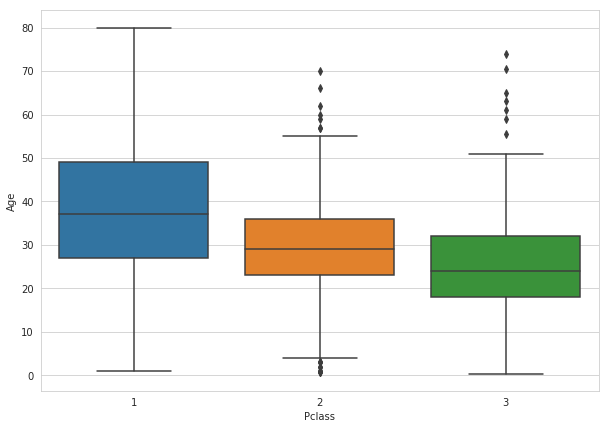

In [43]:
plt.figure(figsize=(10,7))# zoom the haitogram
sns.boxplot(x='Pclass',y='Age',data=train)

###### The wealthier passangers in the first class and second class tend to actually be a bit older than passangers in the third class

###### We can use these average age values in order to impute the age based of the passanger class.

###### Lets go ahead and create a function in order to apply that function I will say imputes_age and it takes the arguments cols

In [48]:
def impute_age(cols):
    Age=cols[0]  # first element
    Pclass=cols[1] # second element
    if pd.isnull(Age):
        if Pclass ==1:
            return 37  # here 37 is the average of the 1 class
        elif Pclass==2:
            return 29
        else:
            return 24
        
    else:
        return Age

###### That is the function and we are going to apply that function

In [49]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

###### Now lets go back and check that heat map again

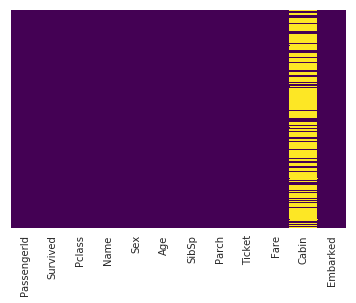

In [55]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

##### No longer have the missing information for the age column

###### Now the issue is the Cabin column, there are too many missing values across this column

###### There is so  much missing information there. Lets goahed and drop that column

In [57]:
train.drop('Cabin',axis=1,inplace=True)

In [58]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

###### There is no  longer that column that no Cabin column

##### Letws run the same syntax again to see the missing values 

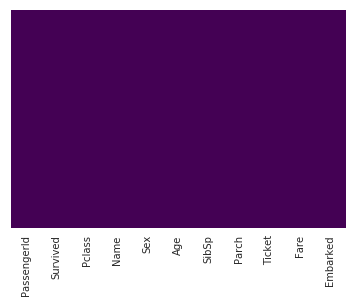

In [59]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### No more missing  values

#### Up to now we completed the first step that filling the missing values and dropped the other vslues

##### Now we need to do the categorical features we will need to convert categorical features in to what is known as a dummy variable using pandas otherwise our machine learning algorithm won't be able to directly take those features as input

##### That means for eample sex column has male or female as string . We have to create a new column taking a 0 or 1 value for some one is male or not in order to encode that information in a way that a machine learning algorithm can understand it.  This is known as the creating the dummy variable

##### We  will do similar for the embarked column. it is a letter representing a city. Again machine learning can't  take in that letter and immidiately know what to do with it. It will need some thing a dummy variable format which is going to indicate a zero or one value with a column as a actual value for the city.

In [60]:
pd.get_dummies(train['Sex'])# it cahnges the caategorical values in teo dummy

female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
5         0     1
6         0     1
7         0     1
8         1     0
9         1     0
10        1     0
11        1     0
12        0     1
13        0     1
14        1     0
15        1     0
16        0     1
17        0     1
18        1     0
19        1     0
20        0     1
21        0     1
22        1     0
23        0     1
24        1     0
25        1     0
26        0     1
27        0     1
28        1     0
29        0     1
..      ...   ...
861       0     1
862       1     0
863       1     0
864       0     1
865       1     0
866       1     0
867       0     1
868       0     1
869       0     1
870       0     1
871       1     0
872       0     1
873       0     1
874       1     0
875       1     0
876       0     1
877       0     1
878       0     1
879       1     0
880       1     0
881       0     1
882       1     0
883       0     1
884       0     1
885       1     0
886       0     1
887       1     0
888       1     0
889       0     1
890       0     1

[891 rows x 2 columns]

###### Now we have a dataframe with a column for every single category and a 0 or 1 value which is essentially just a bullean 0n if they are female 1 if they are female. likewise for a male.

###### Now there is one side issue with this in that one  column here is a perfect predictor of the other column. if our machine learning algorithm gets fed both columns the machine learning al gorithm will immediately know that  hey  if its 0 female I can predict perfectly that its going to be one male. And this is  going to be an issue called the multi-colinearity and it basically mess up the algorithm. In order to avoid this 

In [62]:
pd.get_dummies(train['Sex'],drop_first=True)

male
0       1
1       0
2       0
3       0
4       1
5       1
6       1
7       1
8       0
9       0
10      0
11      0
12      1
13      1
14      0
15      0
16      1
17      1
18      0
19      0
20      1
21      1
22      0
23      1
24      0
25      0
26      1
27      1
28      0
29      1
..    ...
861     1
862     0
863     0
864     1
865     0
866     0
867     1
868     1
869     1
870     1
871     0
872     1
873     1
874     0
875     0
876     1
877     1
878     1
879     0
880     0
881     1
882     0
883     1
884     1
885     0
886     1
887     0
888     0
889     1
890     1

[891 rows x 1 columns]

##### This is exactly what we want to feed in to the machine learning algorithm as a column

#### So we we will set that = sex

In [79]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [80]:
sex.head()

male
0     1
1     0
2     0
3     0
4     1

##### We will do the similar thing to the embark column

In [81]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [82]:
embark.head()

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [85]:
train=pd.concat([train,sex,embark],axis=1)

In [87]:
train.head(2) # the three columns are added on the right 

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Embarked  male  Q  S  
0      0  A/5 21171   7.2500        S     1  0  1  
1      0   PC 17599  71.2833        C     0  0  0

###### The new columnns male Q nad S. These are going to be our replacement column for our machine learning algorithm. These are the indicator or the dummy variables. That means we really do not need the other columns any more. We don't need the Embarked column as already change  it in to Q and S we don't need the Sex column as we already change it in to the male column

###### We will drop the columns that we are not going to use

In [89]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
# Not using some ones name as it is hard to pass in to machine laerning

In [90]:
train.head()
# The all are the numerical values . perfect for the machine learning algorithm.

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

###### The last thing we want to look at is the passangerid. it looks like the index

In [92]:
train.drop('PassengerId',axis=1,inplace=True)

In [93]:
train.head()

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

## Logistic Regression with Python part 3

Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

#### Steo 1. Separate the data in to the  X  and y

#### here  y is the actual label that you are trying to predict

In [98]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [96]:
from sklearn.model_selection import train_test_split

In [100]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

##### step 2 is the train and predict by creating a model for logistic regression

In [108]:
from sklearn.linear_model import LogisticRegression

In [115]:
logmodel = LogisticRegression()

##### step 3 is just training the model

In [116]:
logmodel.fit(X_train,y_train)

/home/bishnu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

##### Now we will go ahead and call some predictions off of this using our X test dataset

In [117]:
predictions=logmodel.predict(X_test)

#### Now lest  go ahead and evaluate our model

In [118]:
from sklearn.metrics import classification_report

#### classification report will basically tell you your presision,your value accuracy, a foreign score etc

##### This way no need to read the confusion matrix

In [119]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

   micro avg       0.77      0.77      0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



###### If you like to have the pure confusion matrix

In [120]:
from sklearn.metrics import confusion_matrix


In [121]:
confusion_matrix(y_test,predictions
# You wil get the confusion matrix to evluate model that way

array([[133,  21],
       [ 40,  74]])

## Logistic Regression Project Exercise

___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [124]:
ad_data= pd.read_csv('advertising.csv')

In [125]:
ad_data.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

** Use info and describe() on ad_data**

In [126]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [128]:
ad_data.describe()

Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

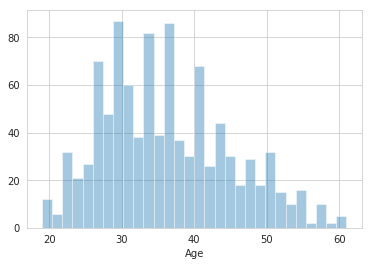

In [135]:
sns.distplot(ad_data['Age'],kde=False,bins=30)

### Another way to do this plot

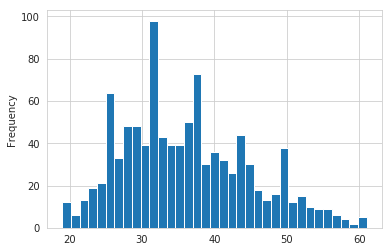

In [171]:
ad_data['Age'].plot.hist(bins=35)

#### **Create a jointplot showing Area Income versus Age.**

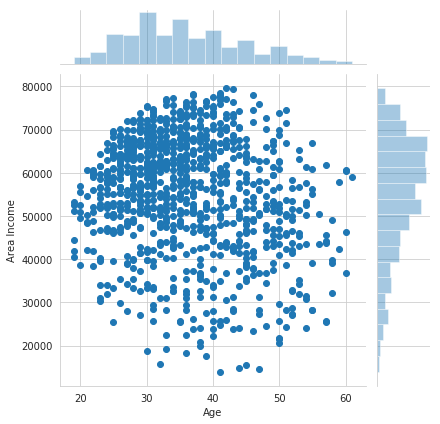

In [140]:
sns.jointplot('Age','Area Income',data=ad_data)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

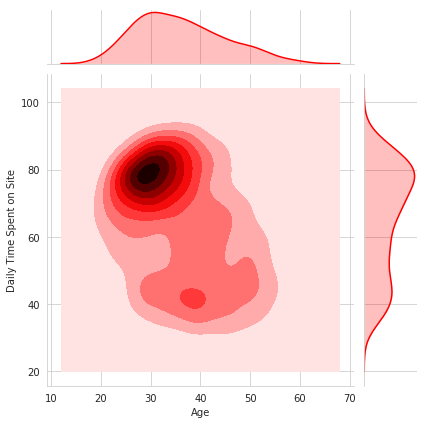

In [150]:
sns.jointplot('Age','Daily Time Spent on Site',data=ad_data,kind='kde',color="r")

In [142]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

##### ** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

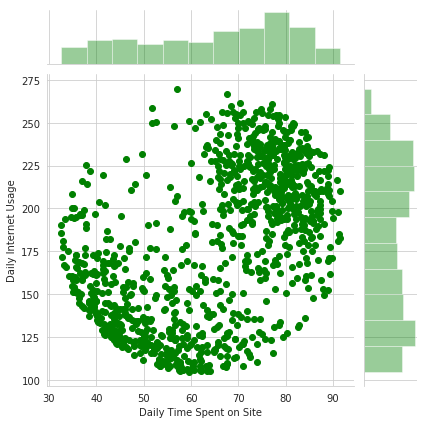

In [151]:
sns.jointplot('Daily Time Spent on Site','Daily Internet Usage',data=ad_data,color="g")

###### ** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

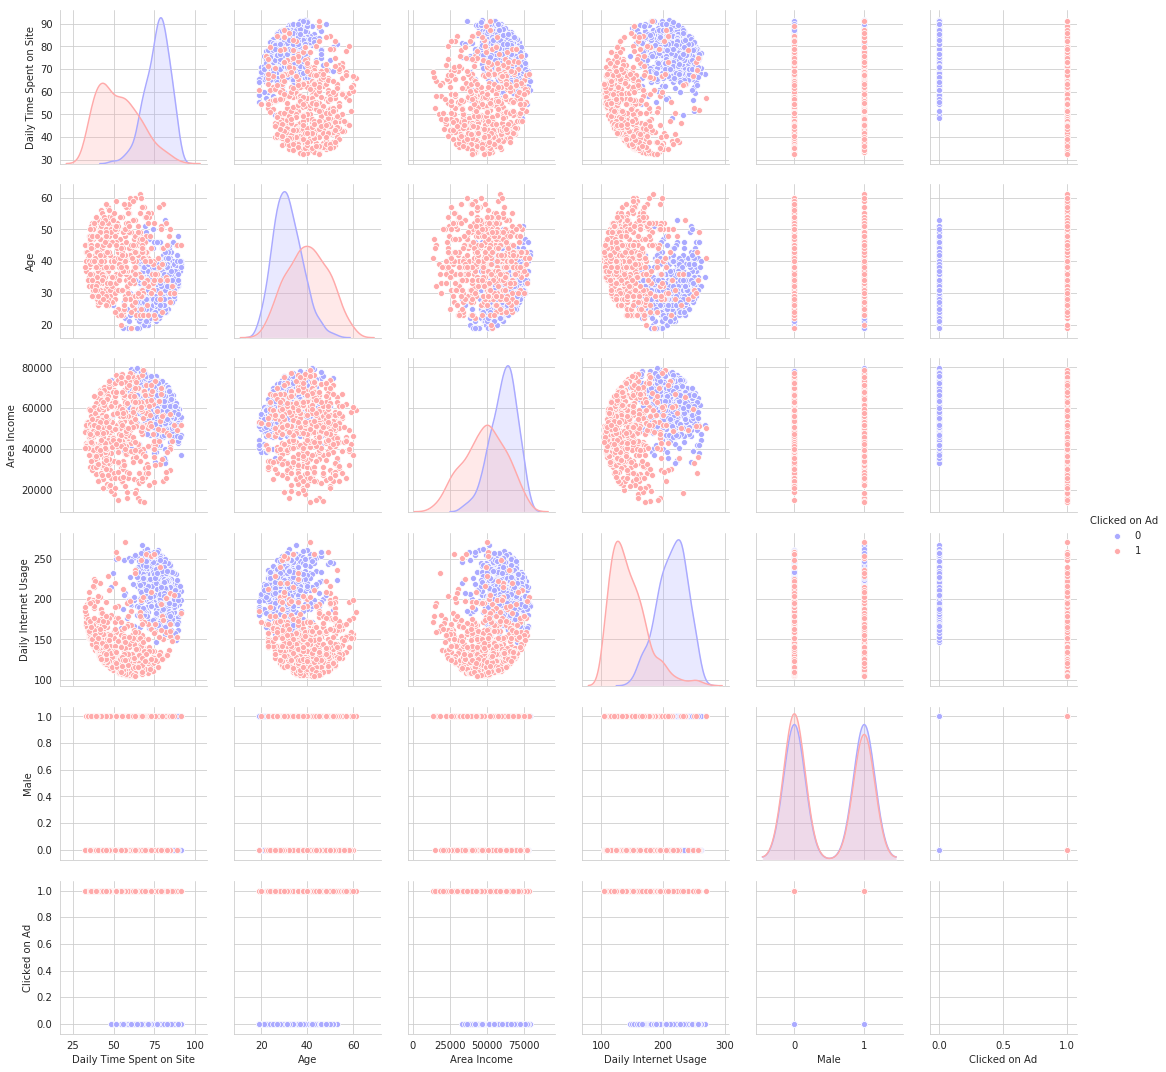

In [159]:
sns.pairplot(data=ad_data,hue='Clicked on Ad',palette='bwr')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

#### ** Split the data into training set and testing set using train_test_split**

In [160]:
from sklearn.model_selection import train_test_split

In [162]:
X=ad_data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage','Male']] # only the numerical column are considerd
y=ad_data['Clicked on Ad']

In [172]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=101)

##### ** Train and fit a logistic regression model on the training set.**

In [164]:
from sklearn.linear_model import LogisticRegression

In [165]:
logmodel = LogisticRegression()

In [166]:
logmodel.fit(X_train,y_train) # the model is created
#ready to predict the data

/home/bishnu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [167]:
predictions = logmodel.predict(X_test)

##### ** Create a classification report for the model.**

In [168]:
from sklearn.metrics import classification_report

In [169]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       162
           1       0.96      0.86      0.91       168

   micro avg       0.91      0.91      0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



# K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

## Import Libraries



In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### K Nearest Neighbors is a classification algorithm that operates on avery simple principle

## Get the Data

Set index_col=0 to use the first column as the index.

In [185]:
df=pd.read_csv('Classified Data',index_col=0)

In [186]:
df.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
3  1.380003  1.522692  1.153093             1  
4  0.646691  1.463812  1.419167             1

## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [177]:
from sklearn.preprocessing import StandardScaler

In [178]:
scaler = StandardScaler()

In [179]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
# like to fit on the data but not on the actual target class
# all other columns are fitting except  the target class

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# The next step is to use the scalar object to do a transformation

In [187]:
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [188]:
scaled_features
# This is the scaled version of the scaled values
# the actual values are quite close to each other

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

##### Now use that scaled features variable to recreate the feature.

In [195]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

        PJF       HQE       NXJ  
0 -1.482368 -0.949719 -0.643314  
1 -0.202240 -1.828051  0.636759  
2  0.285707 -0.682494 -0.377850  
3  1.066491  1.241325 -1.026987  
4 -1.472352  1.040772  0.276510

#### Now we have the standard version of our  data and now the data is ready to put on the machine learning algorithm such as KNN neighbors which really depands upon the distance between each feature

## Train Test Split

In [198]:
from sklearn.model_selection import train_test_split

In [200]:
X=df_feat
y=df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30,random_state=101)

###### Now its time to use  the KNN neighbors and we are try to come with a model to predict whether someone will be insdie that target class or not

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [201]:
from sklearn.neighbors import KNeighborsClassifier

In [202]:
knn = KNeighborsClassifier(n_neighbors=1)
#n_neighbors=1   is the no of the neighbors you want for this model

In [203]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [204]:
pred = knn.predict(X_test) # predictions

#### Now lets do a predictions and evluation off our KNN model and then move on to the elbow method to choose a correct value

In [205]:
from sklearn.metrics import classification_report,confusion_matrix

In [206]:
print(confusion_matrix(y_test,pred))

[[151   8]
 [ 15 126]]


In [207]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [209]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    #predictions will not equal to the actual test values

Text(0, 0.5, 'Error Rate')

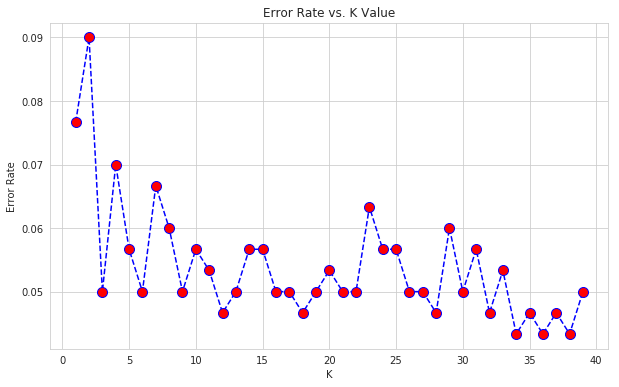

In [210]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [211]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[151   8]
 [ 15 126]]


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [212]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[150   9]
 [ 10 131]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94       159
           1       0.94      0.93      0.93       141

   micro avg       0.94      0.94      0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



##### COVID-19 affected people in Usa During 3 month period:- Sef study

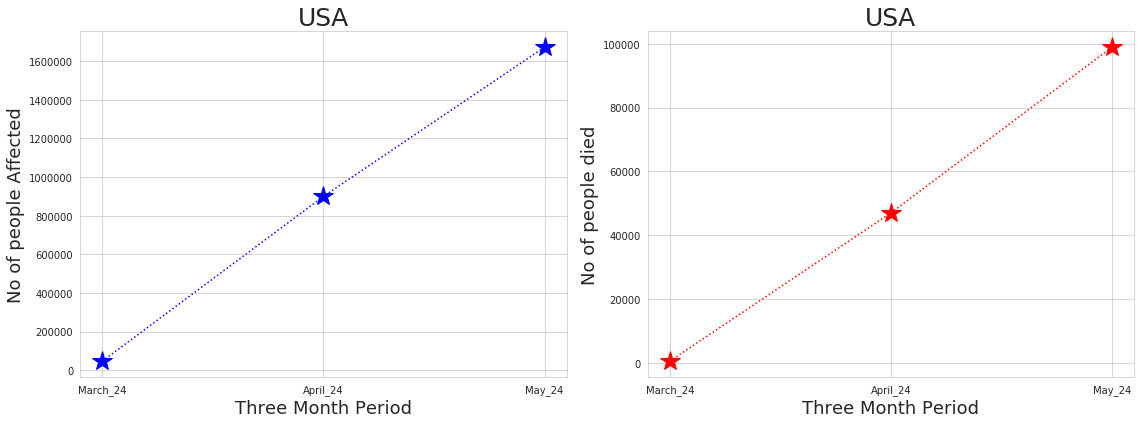

In [259]:
#
plt.subplots(1,2,figsize=(16,6))
plt.subplot(1,2,1)
date=['March_24', 'April_24','May_24']
active= [47000, 900000,1673000]
death=[500,47000,99000]
plt.plot(date,active,color='b',marker='*',linestyle=':',markersize=20)
plt.title("USA",fontsize=25)
plt.xlabel('Three Month Period',fontsize=18)
plt.ylabel('No of people Affected',fontsize=18)

plt.subplot(1,2,2)
plt.title("USA",fontsize=25)
plt.plot(date,death,color='r',marker='*',linestyle=':',markersize=20)
plt.xlabel('Three Month Period',fontsize=18)
plt.ylabel('No of people died',fontsize=18)
plt.tight_layout()

# What will be the next point by the June 24?

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [264]:
KNN= pd.read_csv('KNN_Project_Data')

In [266]:
KNN.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

/home/bishnu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/home/bishnu/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

/home/bishnu/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars

/home/bishnu/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning:

invalid value encountered in reduce



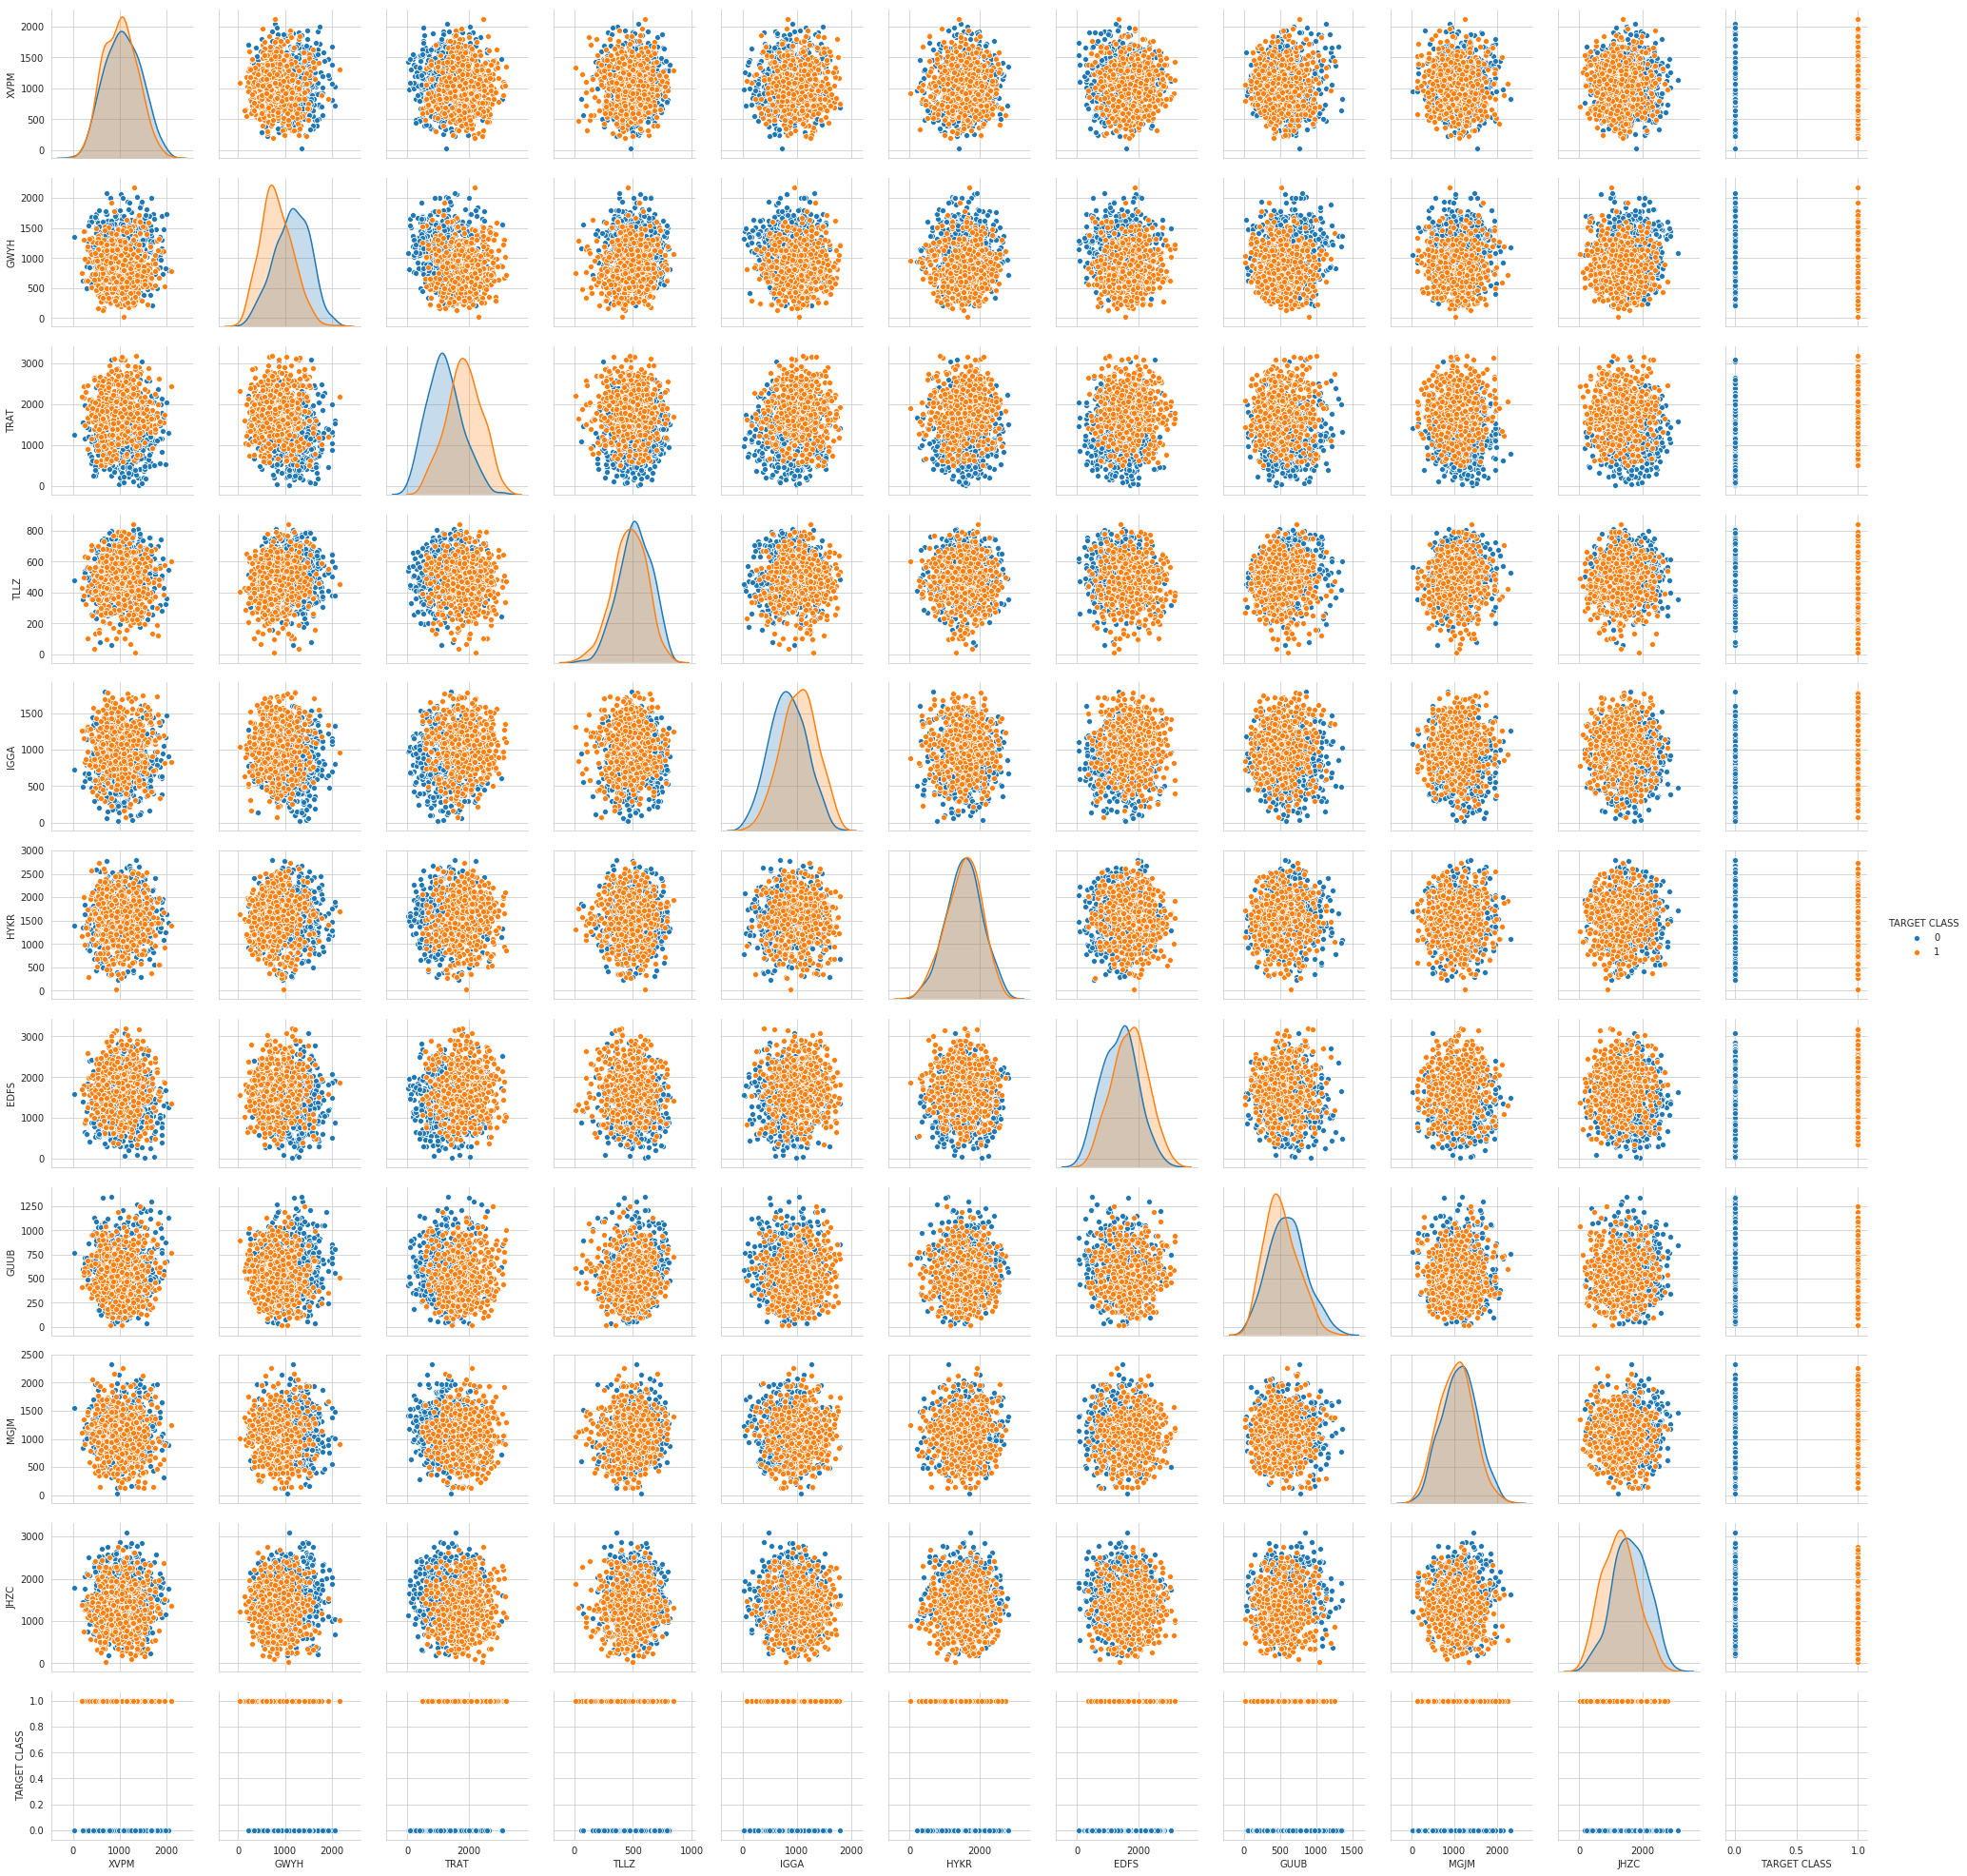

In [268]:
sns.pairplot(KNN,hue='TARGET CLASS')

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [269]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [270]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [271]:
scaler.fit(KNN.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [272]:
scaled_features=scaler.transform(KNN.drop('TARGET CLASS',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [273]:
KNN_feat=pd.DataFrame(scaled_features,columns=KNN.columns[:-1])
KNN_feat.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [274]:
from sklearn.model_selection import train_test_split

In [287]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,KNN['TARGET CLASS'],
                                                    test_size=0.30,random_state=101)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [288]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [289]:
knn1 = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [290]:
knn1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [279]:
pred = knn1.predict(X_test)

** Create a confusion matrix and classification report.**

In [295]:
from sklearn.metrics import classification_report,confusion_matrix

In [294]:
print(confusion_matrix(y_test,pred))

[[72 80]
 [80 68]]


In [296]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.47      0.47      0.47       152
           1       0.46      0.46      0.46       148

   micro avg       0.47      0.47      0.47       300
   macro avg       0.47      0.47      0.47       300
weighted avg       0.47      0.47      0.47       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [297]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train,y_train)
    pred_i = knn1.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Now create the following plot using the information from your for loop.**

Text(0, 0.5, 'Error Rate')

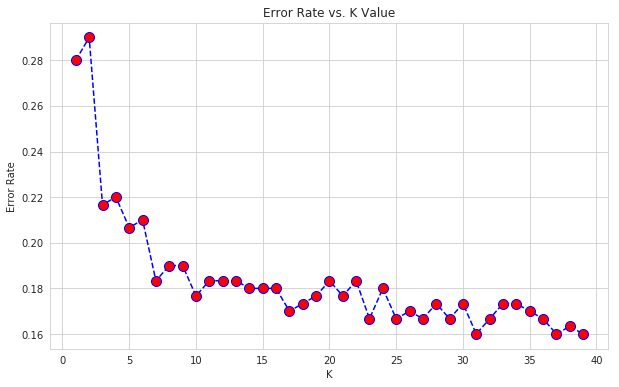

In [298]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [285]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[119  18]
 [ 33 130]]


              precision    recall  f1-score   support

           0       0.78      0.87      0.82       137
           1       0.88      0.80      0.84       163

   micro avg       0.83      0.83      0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



## Tree Method

### Decision Trees and Random Forests in Python

This is the code for the lecture video which goes over tree methods in Python. Reference the video lecture for the full explanation of the code!

I also wrote a [blog post](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411#.hh7n1co54) explaining the general logic of decision trees and random forests which you can check out. 

## Import Libraries

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [300]:
DF = pd.read_csv('kyphosis.csv')

In [301]:
DF.head()

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

In [303]:
DF.info() # only 81 entries so small data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


## EDA

We'll just check out a simple pairplot for this small dataset.

/home/bishnu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



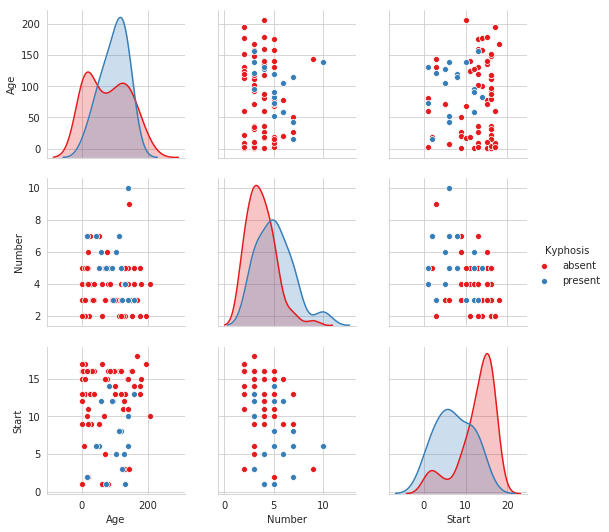

In [304]:
sns.pairplot(DF,hue='Kyphosis',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [ ]:
from sklearn.model_selection import train_test_split

In [305]:
X = DF.drop('Kyphosis',axis=1) #target is the Kyphosis
y = DF['Kyphosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [306]:
from sklearn.tree import DecisionTreeClassifier

In [307]:
dtree = DecisionTreeClassifier()

In [308]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [312]:
predictions = dtree.predict(X_test)

In [313]:
from sklearn.metrics import classification_report,confusion_matrix

In [315]:
print(confusion_matrix(y_test,predictions))
print('\n')#new line for the good readbility
print(classification_report(y_test,predictions))

[[106  46]
 [ 48 100]]


              precision    recall  f1-score   support

           0       0.69      0.70      0.69       152
           1       0.68      0.68      0.68       148

   micro avg       0.69      0.69      0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.69      0.69      0.69       300



#### NOw lets  see how these results compare to the random forced model

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [324]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(DF.columns[1:])
features

['Age', 'Number', 'Start']

In [319]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

#need another library to run this which is tedious work
# So skipping this part
# www.graphviz.org    is the graph visualiztion software
# Is the completely separate software from the python

FileNotFoundError: [Errno 2] "dot" not found in path.

In [320]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [321]:
rfc_pred = rfc.predict(X_test)

In [322]:
print(confusion_matrix(y_test,rfc_pred))

[[125  27]
 [ 29 119]]


In [323]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       152
           1       0.82      0.80      0.81       148

   micro avg       0.81      0.81      0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [326]:
loans = pd.read_csv('loan_data.csv')

In [327]:
loans.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [328]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [330]:
loans.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

Text(0.5, 0, 'FICO')

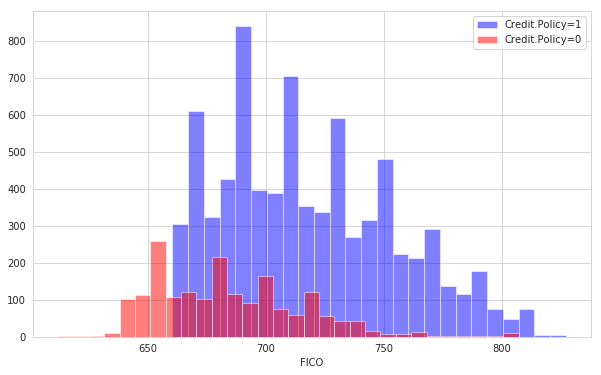

In [331]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

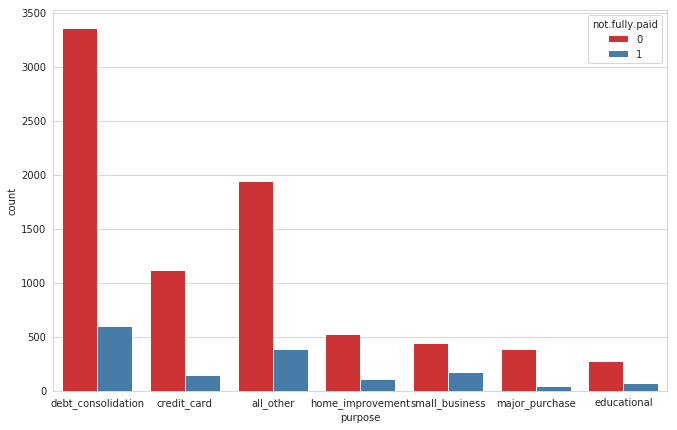

In [339]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',data=loans,hue='not.fully.paid',palette='Set1')

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

/home/bishnu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



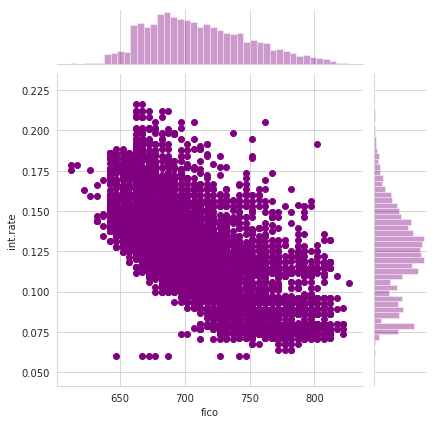

In [341]:
sns.jointplot(data=loans,x='fico',y='int.rate',color='purple')

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

<Figure size 792x504 with 0 Axes>

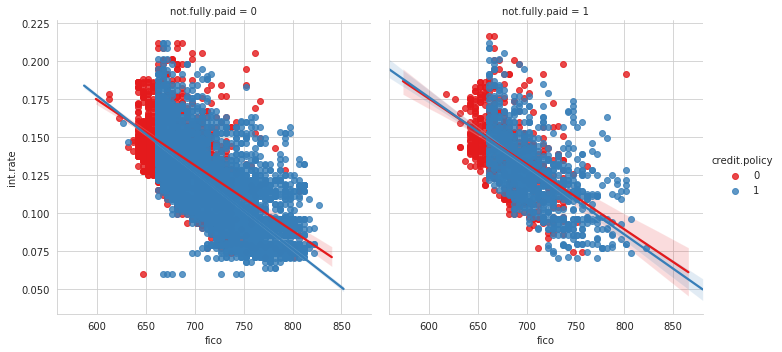

In [342]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**